In [4]:
! pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.1 MB/s eta 0:00:51
    --------------------------------------- 0.8/56.8 MB 1.1 MB/s eta 0:00:51
    --------------------------------------- 0.8/56.8 MB 1.1 MB/s eta 0:00:51
    --------------------------------------- 1.0/56.8 MB 1.1 MB/s eta 0:00:51
    --------------------------------------- 1.3/56.8 MB 1.1 MB/s eta 0:00:50
   - -------------------------------------- 1.6/56.8 MB 1.1 MB/s eta 0:00:50
   - -------------------------------------- 1.8/56.8 MB 1.1 MB/s eta 0:00:50
   - -------------------------------------- 2.1/56.8 MB 1.1 MB/s eta 0:00:50
   - -------------------------------------- 2.4/56.8 MB 1.1 MB/s eta 0:00:50
   - -------------------------------------- 2.6/56.8 MB 1.1 MB/s eta 0:00:49
   -- ------------------------------------- 2.9/56.8 MB 1.1 MB/s eta 0:00:49
   -- -------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\MUSTAQEEM\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:34:42] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 86.96%


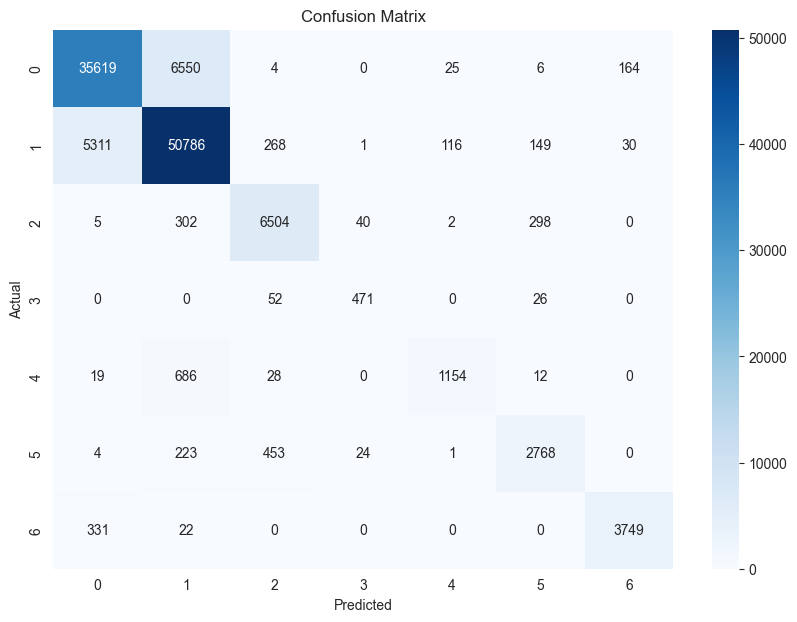

<Figure size 1200x800 with 0 Axes>

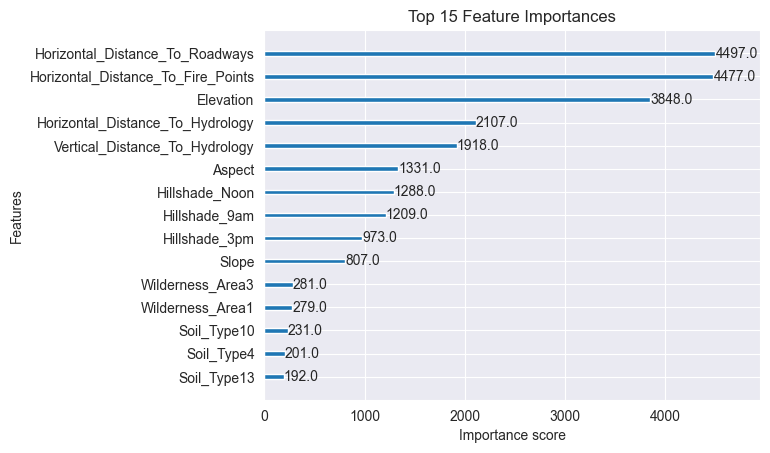

In [7]:
# Forest Cover Type Classification with XGBoost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier, plot_importance

# First we will Load the dataset
df = pd.read_csv("data/covtype.csv")

# Secondly we will Separate features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type'] - 1

# Thirdly we will perform Train/test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Fourthly we will Initialize and train XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=8, eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

# now Making predictions
y_pred = model.predict(X_test)

# Then we will Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Featuring Importance Plot
plt.figure(figsize=(12, 8))
plot_importance(model, max_num_features=15)
plt.title("Top 15 Feature Importances")
plt.show()
